# Data exploration

In this notebook, the simulated CMS data is analysed.

In [1]:
# Python imports
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in data
Each hdf file contains one type of event.

First lets look at the data for associated production of a standard model Higgs boson
with a top quark-antiquark pair (ttH).

In [2]:
DIR = "U:\\...............\\ttH125_part1-1\\"
filename = "df_ml_inputs.hd5"
data = pandas.read_hdf(DIR+filename)
data.head()

,dataset,entry,BiasedDPhi,CleanJet_area,CleanJet_btagDeepB,CleanJet_eta,CleanJet_mass,CleanJet_phi,CleanJet_pt,DiJet_mass,...,MetNoLep_pt,MinChi,MinOmegaHat,MinOmegaTilde,cleanJetMask,hashed_filename,min_dphi_clean_2j,nMediumBJet,ncleanedJet,weight_nominal
0,ttH125,0,-1.778865,"[0.5185547, 0.4987793, 0.50878906, 0.50878906,...","[0.029174805, 0.14453125, 0.015586853, 0.99414...","[-0.7578125, 1.5549316, -0.829834, 0.17694092,...","[16.921875, 14.375, 15.421875, 14.0078125, 5.9...","[0.84484863, 2.9082031, 2.385254, -0.13739014,...","[187.72398, 110.44861, 98.10987, 78.36121, 24....",481.783447,...,249.044373,1.217749,0.872760,0.606425,"[True, True, True, True, False, False, False, ...",5530107896396222728,1.677152,2,4,0.542269
1,ttH125,21,-2.579112,"[0.5185547, 0.5185547, 0.46875, 0.4987793, 0.5...","[0.89501953, 0.049560547, 0.028533936, 0.03643...","[-1.0178223, -0.023029327, -0.96203613, 1.2939...","[16.125, 18.8125, 10.78125, 9.34375, 5.1054688...","[1.9628906, 1.5002441, 0.8522949, -2.0917969, ...","[139.25433, 118.855965, 51.210255, 43.200733, ...",150.522995,...,241.790039,1.293716,1.063367,0.717007,"[True, True, True, True, False, False, False]",5530107896396222728,2.766070,1,4,0.394597
2,ttH125,24,-1.027894,"[0.47875977, 0.45874023, 0.4987793, 0.54833984]","[0.20336914, 0.56152344, 0.9433594, 0.06768799]","[0.86865234, 1.5227051, 0.822876, -0.34057617]","[35.90625, 18.9375, 19.578125, 4.9140625]","[0.80236816, 0.76135254, 2.899414, 2.0595703]","[232.51115, 158.9396, 143.8975, 22.354103]",141.080978,...,380.096130,1.165188,0.971165,0.561480,"[True, True, True, False]",5530107896396222728,2.679346,2,3,0.189981
3,ttH125,26,0.468110,"[0.54833984, 0.5288086, 0.47875977, 0.4987793,...","[0.05117798, 0.009429932, 0.031585693, 0.04650...","[-0.077301025, -0.48242188, -2.055664, -0.8768...","[26.828125, 14.2109375, 13.2421875, 8.1171875,...","[2.7626953, -1.1677246, -3.0917969, 0.46002197...","[309.31284, 135.91432, 96.95274, 45.217068, 37...",389.885284,...,301.562256,1.123323,0.800008,0.301402,"[True, True, True, True, True, True, False, Fa...",5530107896396222728,0.934588,1,6,0.418886
4,ttH125,30,-0.167588,"[0.48876953, 0.46875, 0.5185547, 0.4987793, 0....","[0.034942627, 0.026062012, -2.0, -2.0, 0.05169...","[0.11433411, -1.0634766, -1.3886719, -3.482421...","[77.9375, 29.296875, 13.15625, 10.65625, 9.289...","[-1.5944824, 1.6647949, 0.6295166, -0.02134704...","[730.07007, 337.02316, 78.2082, 54.607513, 45....",1173.053223,...,311.689667,0.126573,0.126573,0.104036,"[True, True, True, True, True, True, True, Tru...",5530107896396222728,0.287473,1,8,0.487595


Each dataframe consists of 23 columns, and a variable number of rows. Each row is a single event detected by the CMS detector.


This dataframe has the following size:

In [3]:
data.shape

(101547, 23)

### Event data
Each column contains data of either a single floating point value, or an array of floating point values.
The following section lists the columns which contain single float values.

In [4]:
columns = list(data.columns.values)
float_cols = []
row_idx = 0

for idx, col in enumerate(columns):
    if isinstance(data[col].iloc[row_idx ], (np.float32, np.float64)):
        float_cols.append(col)
        print(f"index: {idx:2}    name: {col:28} value: {data[col].iloc[row_idx ]:12.8f}    type: {data[col].dtypes}")


index:  2    name: BiasedDPhi                   value:  -1.77886462    type: float32
index:  9    name: DiJet_mass                   value: 481.78344727    type: float32
index: 10    name: HT                           value: 474.64367676    type: float32
index: 11    name: MHT_pt                       value: 223.76417542    type: float32
index: 12    name: MetNoLep_CleanJet_mindPhi    value:   1.56044030    type: float32
index: 13    name: MetNoLep_pt                  value: 249.04437256    type: float32
index: 14    name: MinChi                       value:   1.21774900    type: float32
index: 15    name: MinOmegaHat                  value:   0.87276024    type: float32
index: 16    name: MinOmegaTilde                value:   0.60642505    type: float32
index: 19    name: min_dphi_clean_2j            value:   1.67715216    type: float64
index: 22    name: weight_nominal               value:   0.54226935    type: float64


### Jet data
There are 7 columns which contains arrays of values. Each array is not necessarily the same length. The following code prints the minimum array length and the maximum array length for each of these 7 columns.

In [5]:
for idx, col in enumerate(columns):
    test = data[col]
    try:
        num_tests = []
        for row in test:
            num_tests.append(row.shape[0])
        num_tests = np.asarray(num_tests)
        print(f"{col:20} min len: {num_tests.min()}    max len: {num_tests.max()}    type: {type(num_tests)}")
    except:
        pass

CleanJet_area        min len: 1    max len: 18    type: <class 'numpy.ndarray'>
CleanJet_btagDeepB   min len: 1    max len: 18    type: <class 'numpy.ndarray'>
CleanJet_eta         min len: 1    max len: 18    type: <class 'numpy.ndarray'>
CleanJet_mass        min len: 1    max len: 18    type: <class 'numpy.ndarray'>
CleanJet_phi         min len: 1    max len: 18    type: <class 'numpy.ndarray'>
CleanJet_pt          min len: 1    max len: 18    type: <class 'numpy.ndarray'>
cleanJetMask         min len: 1    max len: 18    type: <class 'numpy.ndarray'>


### 'BiasedDPhi' distribution
Now that we've seen the kind of data each column represents, lets look at how the values in each column are distributed. Take the first column, the 'BiasedDPhi' data:

count    101547.000000
mean         -1.841028
std           1.295419
min          -3.141588
25%          -2.825211
50%          -2.369140
75%          -1.201766
max           3.059091
Name: BiasedDPhi, dtype: float64


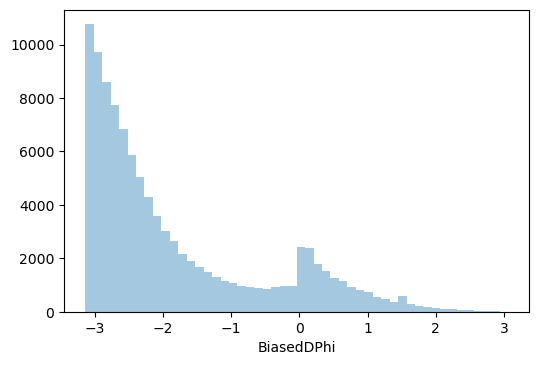

In [6]:
print(data['BiasedDPhi'].describe())
fig = plt.figure(figsize=(6,4), dpi= 100)
sns.distplot(data['BiasedDPhi'], kde=False)

The y-axis measures the number of events within each bin.

The 'BiasedDPhi' data shows two peaks centered roughly around 0 and -3.

### Plots of all event level data
For completeness, lets plot each of the other columns with float values:

BiasedDPhi, DiJet_mass, HT, MHT_pt, MetNoLep_CleanJet_mindPhi, MetNoLep_pt, MinChi, MinOmegaHat, MinOmegaTilde, min_dphi_clean_2j, weight_nominal

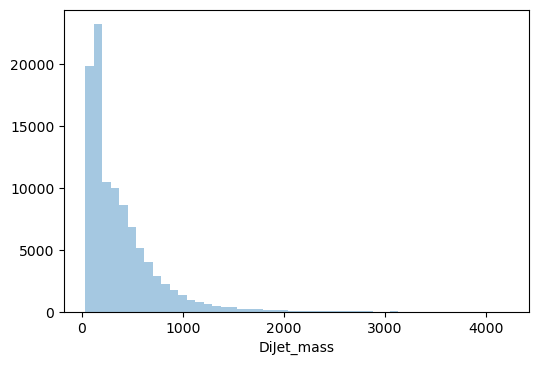

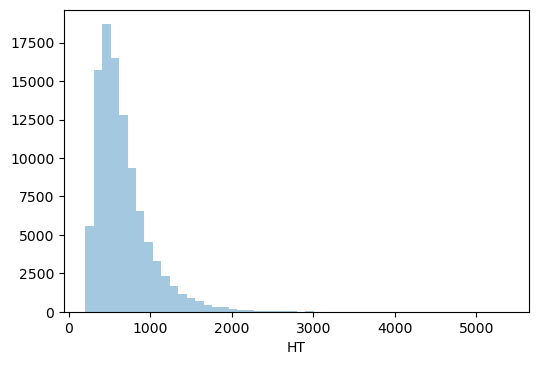

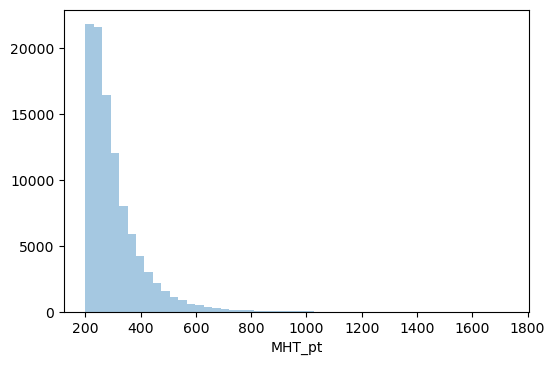

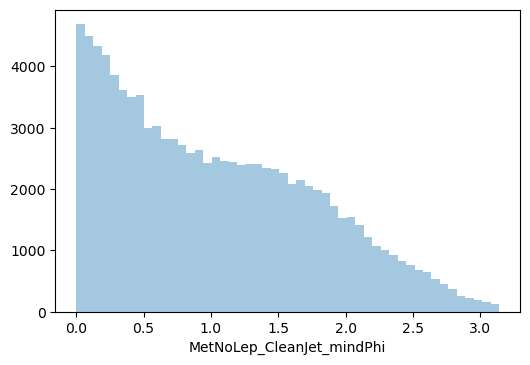

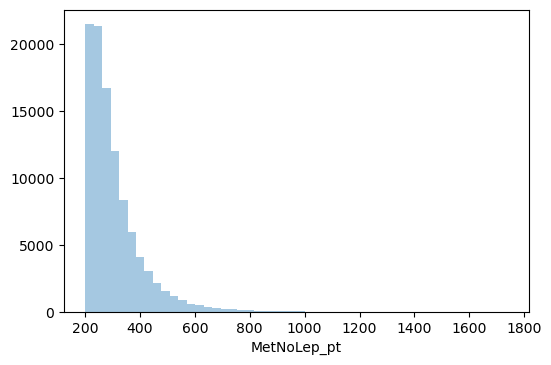

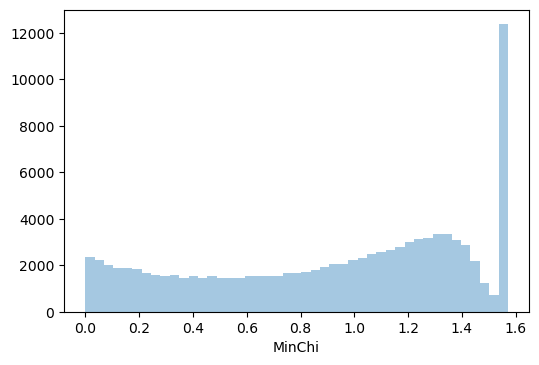

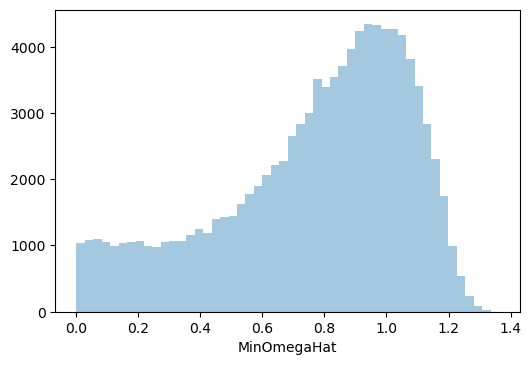

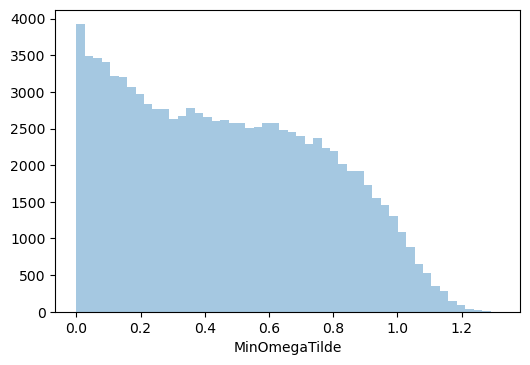

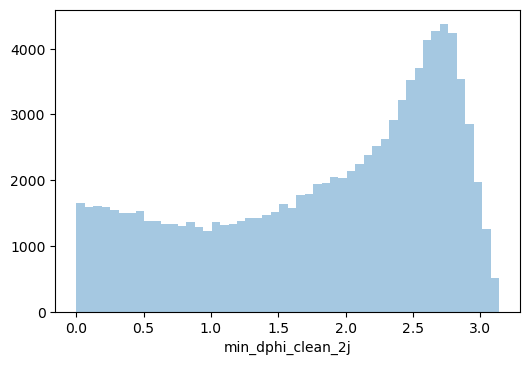

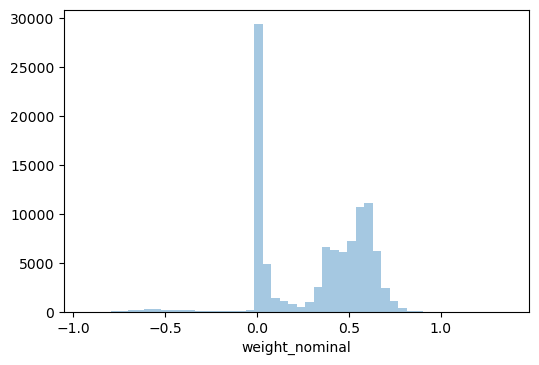

In [7]:
for col in float_cols[1:]:
    fig = plt.figure(figsize=(6,4), dpi= 100)
    sns.distplot(data[col], kde=False)

### Correlation matrix of event data

Lets view a correlation matrix to see which, if any of the variables are correlated. Ignore the 'weight_nominal' as this is just a normalisation factor.

In [8]:
data_float = data[float_cols[:-1]]
data_float.shape

(101547, 10)

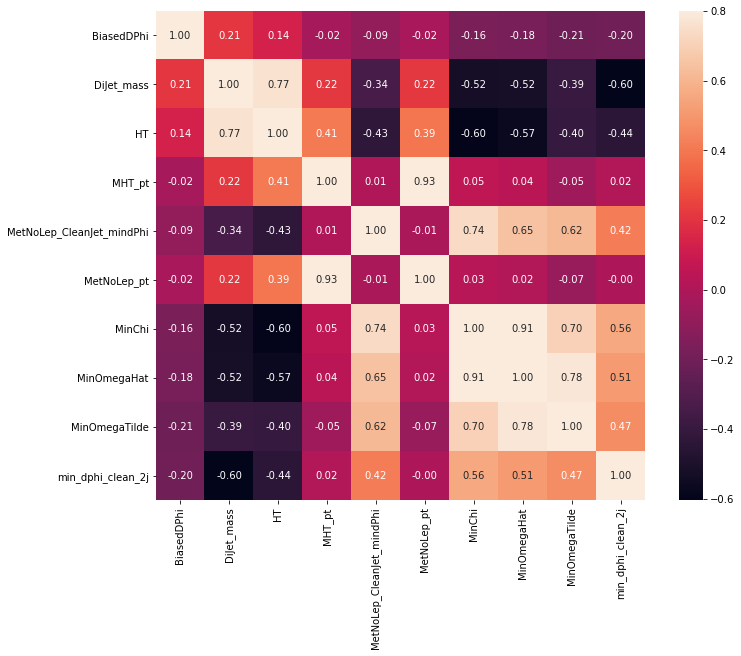

In [9]:
corrmat = data_float.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')

'HT' represents the scalar sum of the momentum-energy that goes into the interaction.

### 'CleanJet_pt' jet data plot

'CleanJet_pt' represents the transverse momentum of the jet. It would be useful to see what the distribution of jet momenta looks like across all of the event data. This is plotted below:

In [32]:
data_Jet_pt = data['CleanJet_pt']
data_Jet_pt.head()
areas = []
for row in data_Jet_pt:
    for element in row:
        areas.append(element)

print(len(areas))

692547


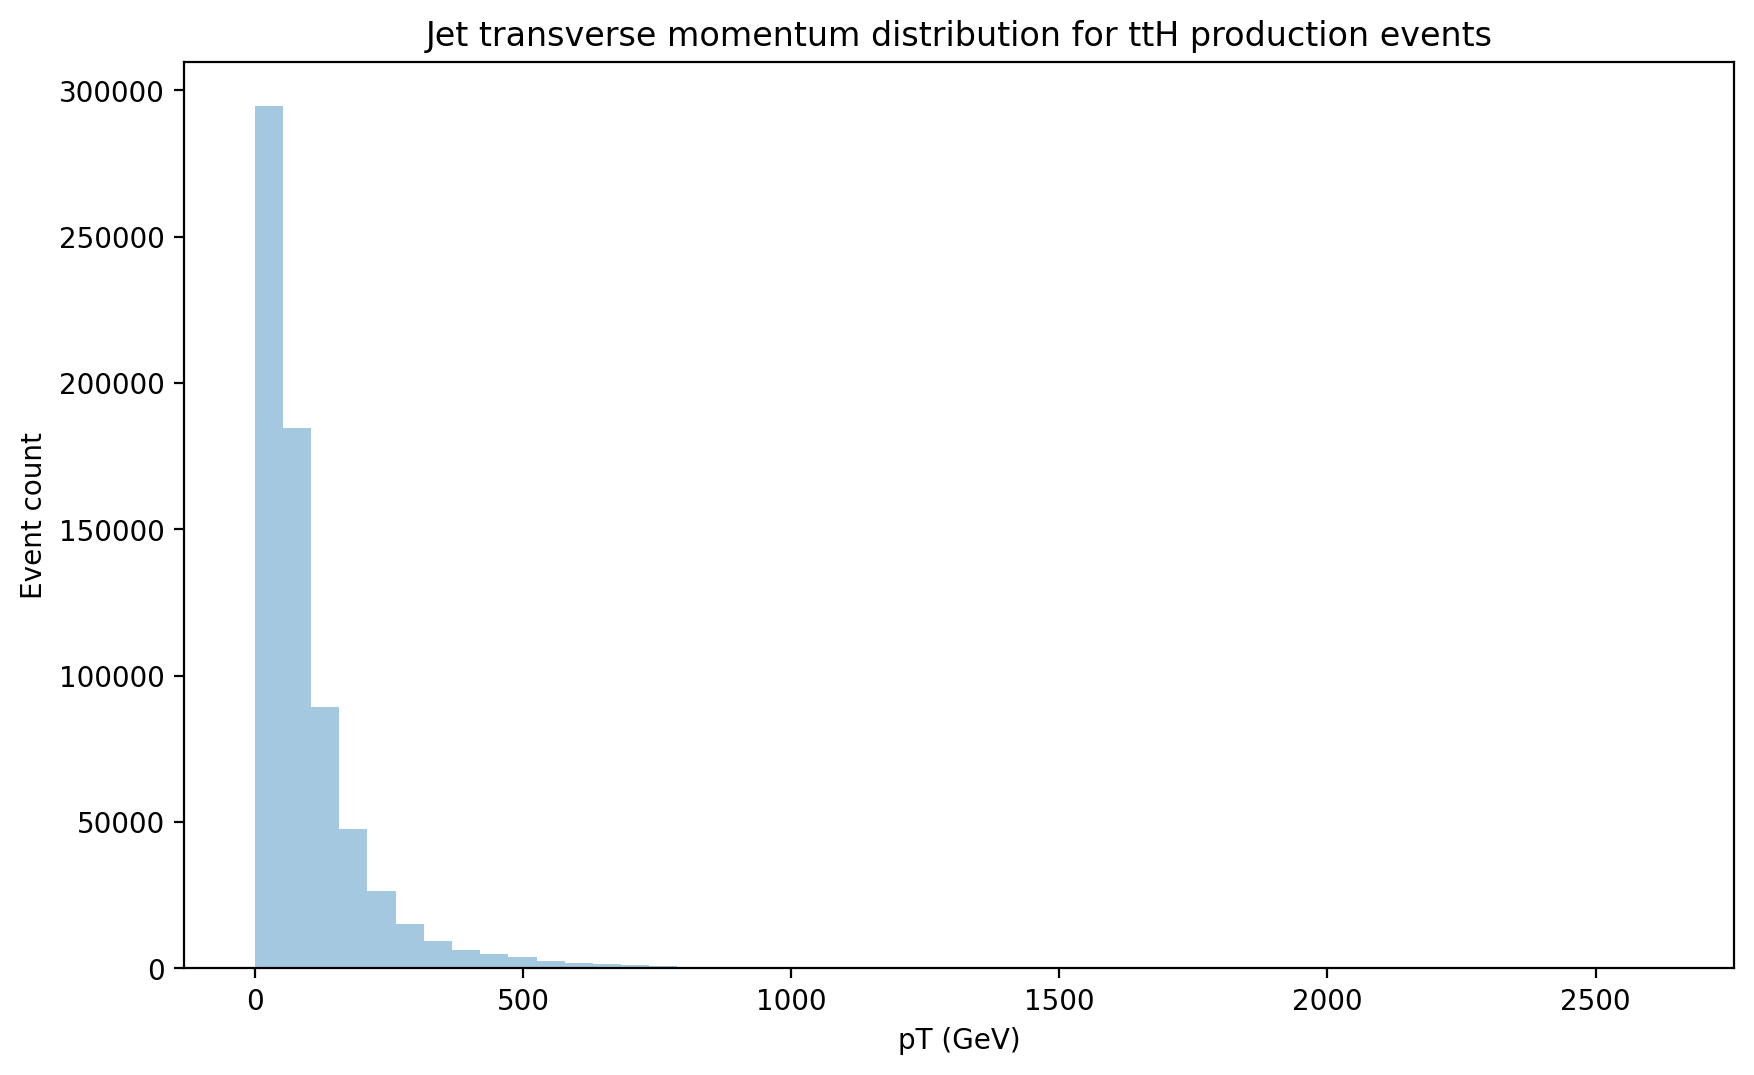

In [33]:
fig = plt.figure(figsize=(10,6), dpi= 200)
plt.title("Jet transverse momentum distribution for ttH production events")
plt.xlabel("pT (GeV)")
plt.ylabel("Event count")
sns.distplot(areas, kde=False)

### Comparison of ttH and TTTo2L2Nu events

Now lets look at the dataset for TTTo2L2Nu and compare/contrast the data

In [12]:
DIR = "U:\\.............\\TTTo2L2Nu\\"
DIR = "U:\\.............\\TTToSemiLeptonic\\"
DIR = "U:\\.............\\TTToHadronic\\"
filename = "df_ml_inputs.hd5"

data2 = pandas.read_hdf(DIR+filename)
HT_TTTo2L2Nu = data2['MetNoLep_CleanJet_mindPhi']
HT_ttH125 = data['MetNoLep_CleanJet_mindPhi']
print(f"Data shape: {data.shape}")
print(f"Data2 shape: {data2.shape}")

Data shape: (101547, 23)
Data2 shape: (20115, 23)


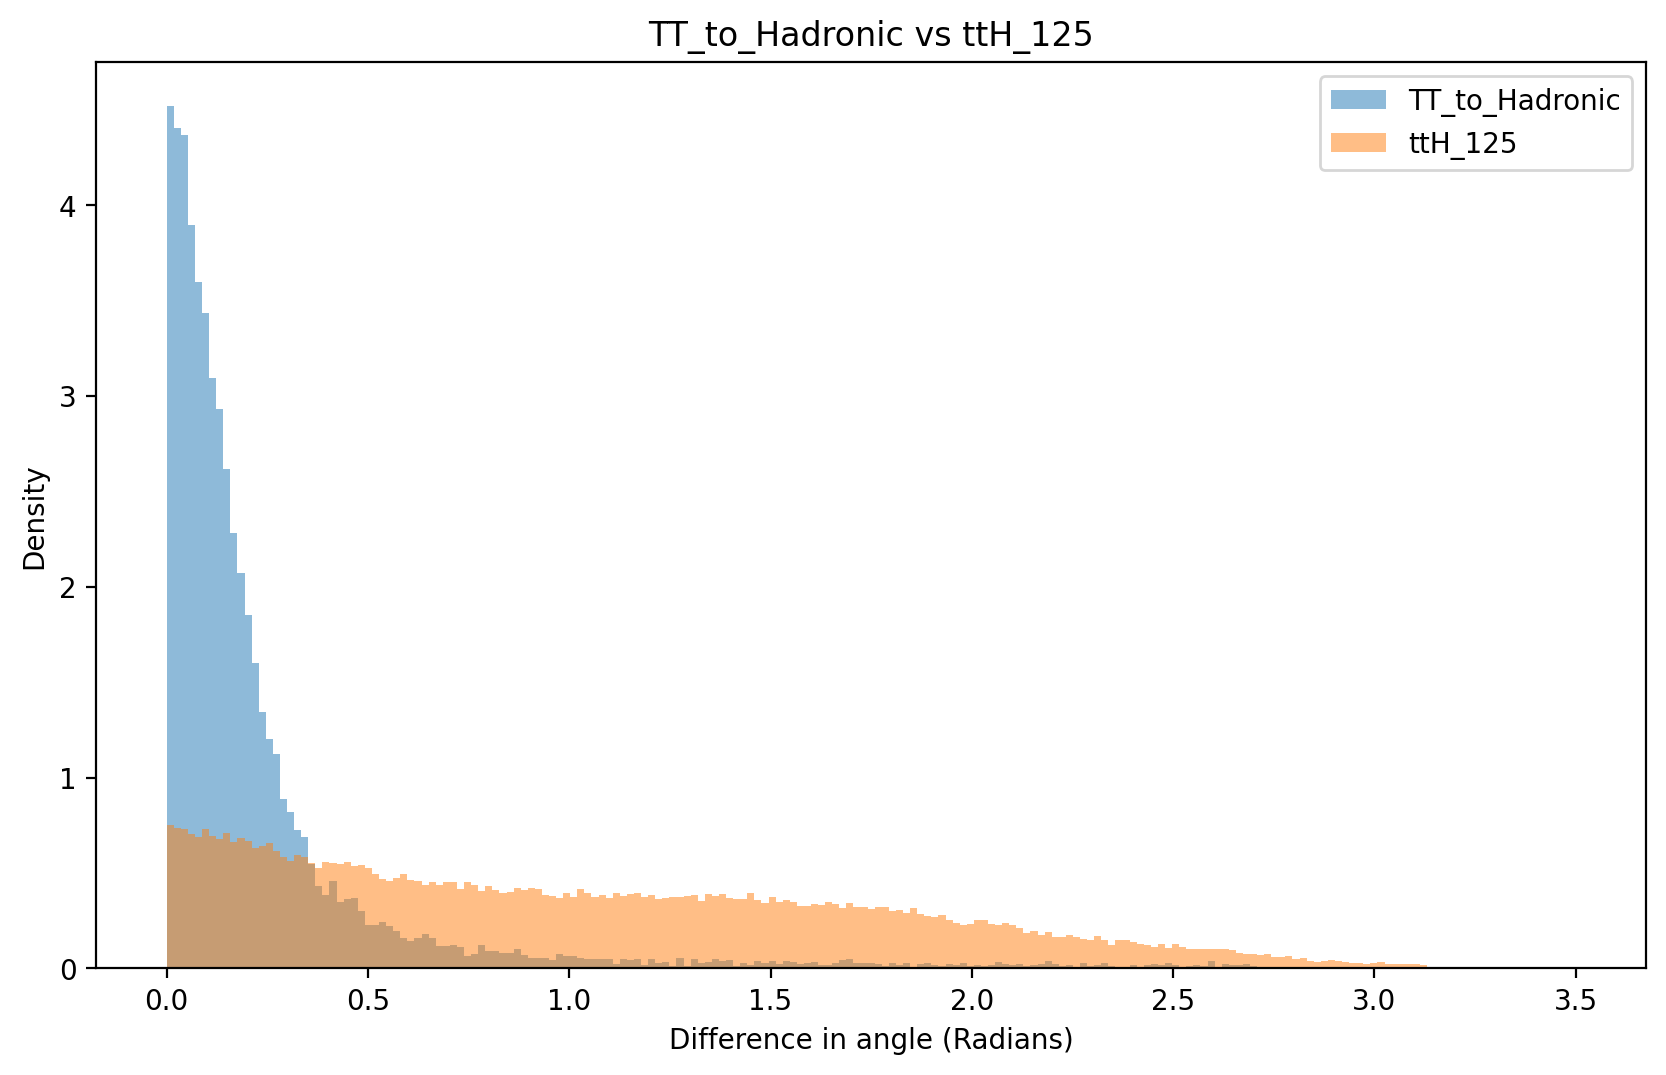

In [21]:
bins = np.linspace(0, 3.5, 200)

fig = plt.figure(figsize=(10, 6), dpi=200)

plt.title("TT_to_Hadronic vs ttH_125")
plt.xlabel("Difference in angle (Radians)")
plt.ylabel("Density")
# plt.xlim(0, 10)

plt.hist(HT_TTTo2L2Nu, bins, alpha=0.5, label='TT_to_Hadronic', density=True)
plt.hist(HT_ttH125, bins, alpha=0.5, label='ttH_125', density=True)
plt.legend(loc='upper right')
plt.show()

Now let's compare the difference in the CleanJet transverse momenta between the datasets (CleanJet_pt).
Firstly, make a list of all 'pt' values for each dataset:

In [14]:
data1_Jet_pt = data['CleanJet_pt']
pt1 = []
for row in data1_Jet_pt:
    for element in row:
        pt1.append(element)

data2_Jet_pt = data2['CleanJet_pt']
pt2 = []
for row in data2_Jet_pt:
    for element in row:
        pt2.append(element)

### Now plot the data in a histogram

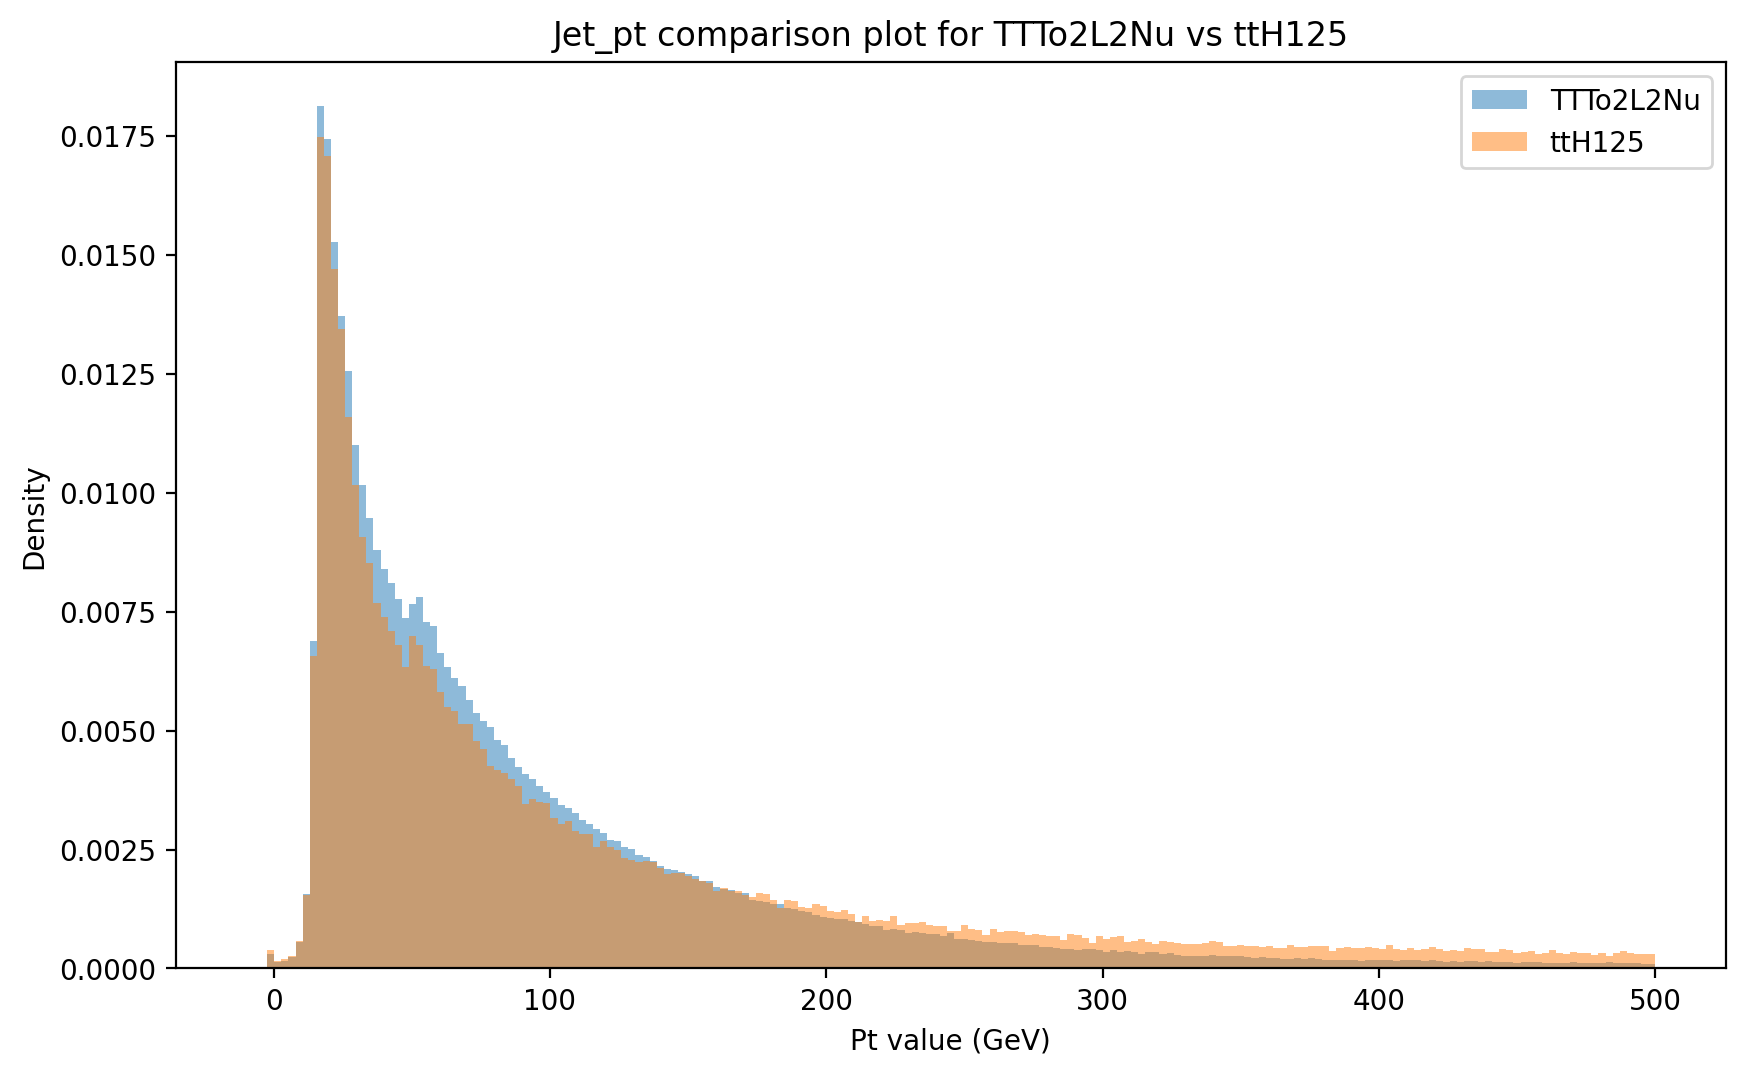

In [15]:
bins = np.linspace(-10, 500, 200)

fig = plt.figure(figsize=(10, 6), dpi=200)

plt.title("Jet_pt comparison plot for TTTo2L2Nu vs ttH125")
plt.xlabel("Pt value (GeV)")
plt.ylabel("Density")

plt.hist(pt1, bins, alpha=0.5, label='TTTo2L2Nu', density=True)
plt.hist(pt2, bins, alpha=0.5, label='ttH125', density=True)
plt.legend(loc='upper right')
plt.show()

### Comparison of jet number
Now lets do a comparison of the number of jets present per event:

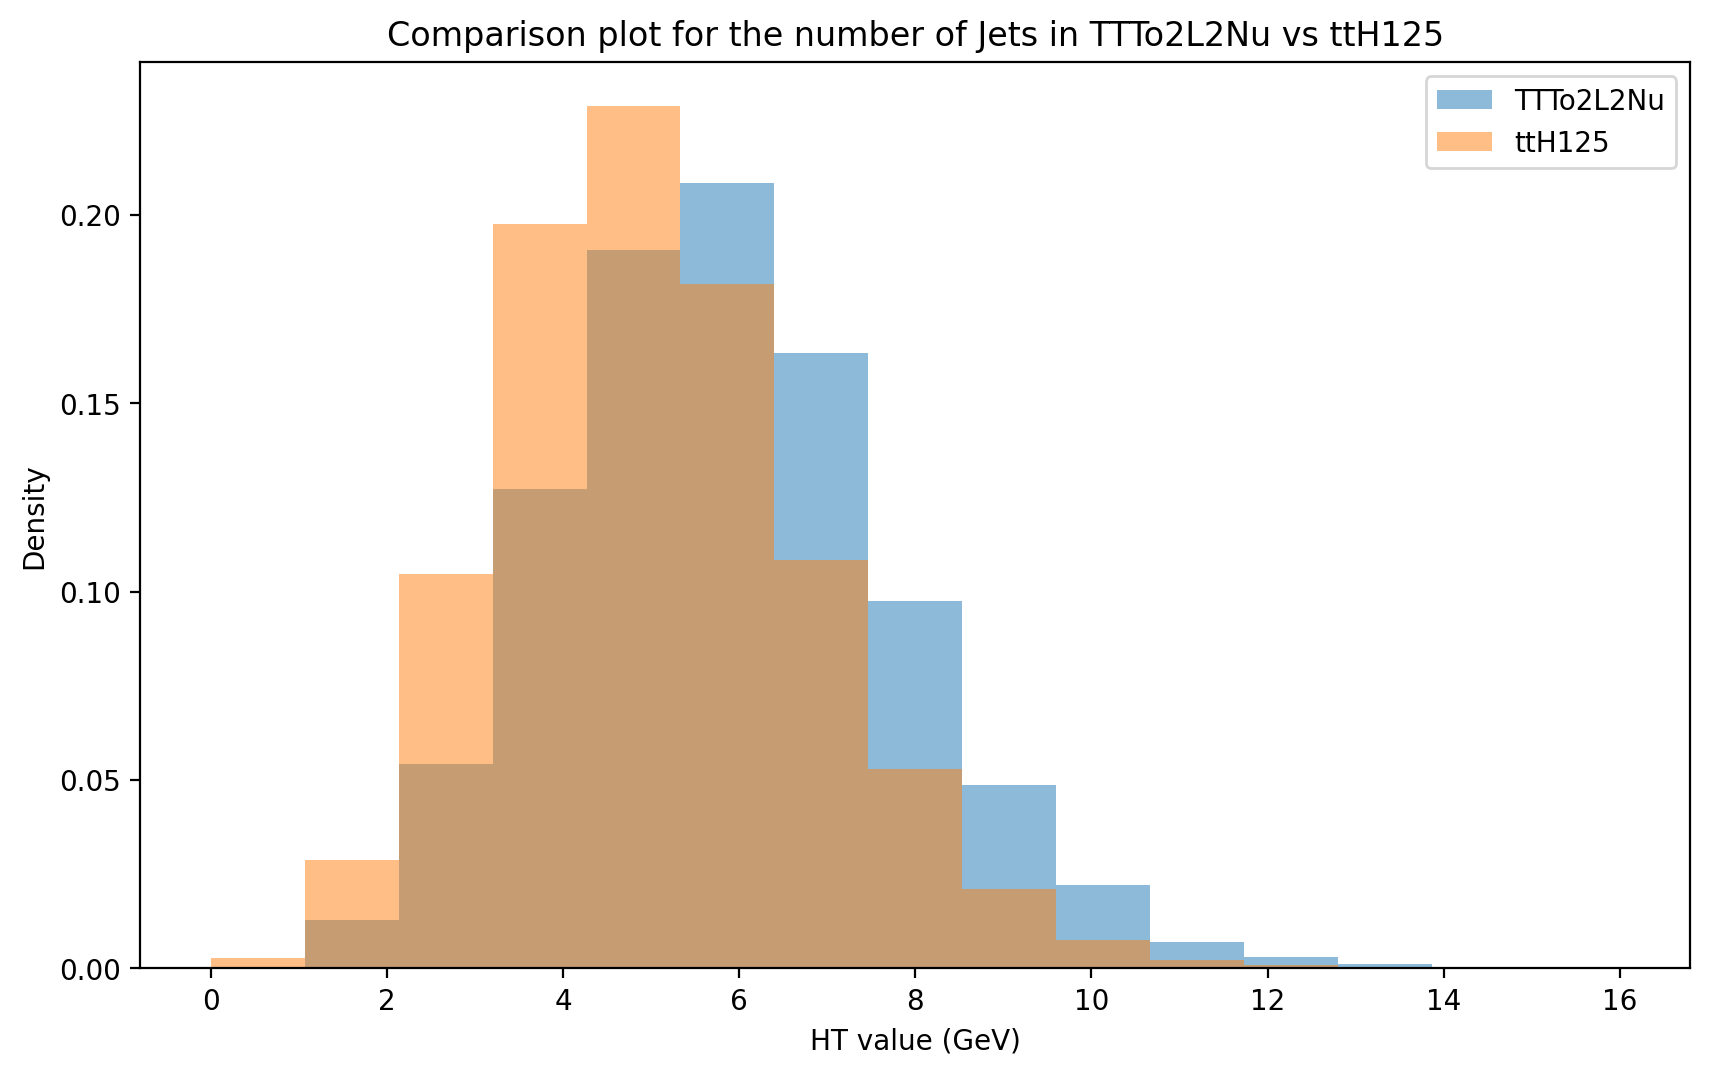

In [16]:
bins = np.linspace(0, 16, 16)

fig = plt.figure(figsize=(10, 6), dpi=200)

plt.title("Comparison plot for the number of Jets in TTTo2L2Nu vs ttH125")
plt.xlabel("HT value (GeV)")
plt.ylabel("Density")

plt.hist(data2['ncleanedJet'], bins, alpha=0.5, label='TTTo2L2Nu', density=True)
plt.hist(data['ncleanedJet'], bins, alpha=0.5, label='ttH125', density=True)
plt.legend(loc='upper right')
plt.show()